In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv('movie_metadata.csv')

In [71]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [61]:
df.duplicated().sum()

45

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [6]:
df.dtypes  

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [7]:
# categorize numerical columns and object columns
num_col = list(df.columns [ df.dtypes != 'object'])
obj_col = list(df.columns [df.dtypes == 'object'])

print('obj columns: ', obj_col, '\n\nnum columns: ', num_col)

obj columns:  ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'] 

num columns:  ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [10]:
df[obj_col].isnull().sum()


color               19
director_name      103
actor_2_name        13
genres               0
actor_1_name         7
movie_title          0
actor_3_name        23
plot_keywords      152
movie_imdb_link      0
language            12
country              5
content_rating     301
dtype: int64

In [52]:
df[['title_year', 'genres', 'movie_title']][ df['color'].isnull() ] # all returned are 'Color' 

,title_year,genres,movie_title


In [53]:
color_fill = df['color'].mode().iloc[0]

In [54]:
# fillna for ['color'] with 'Color'
df['color'].fillna(color_fill, inplace=True)
df['color'].value_counts()

1    4365
0     189
Name: color, dtype: int64

In [55]:
df[['movie_title']] [df['actor_1_name'].isnull()]

,movie_title


In [15]:
# fill in corresponding 'actor_1_name'
df.loc[4502, 'actor_1_name'] = 'Oana Suteu'
df.at[4519, 'actor_1_name'] = ''
df.at[4720, 'actor_1_name'] = 'Perla Sanchez'
df.at[4837, 'actor_1_name'] = 'Brahmanand Swamigal'
df.at[4945, 'actor_1_name']='Marion Tennant'
df.at[4946, 'actor_1_name']= 'Ibrahim al-Azawi'
df.at[4990, 'actor_1_name']= ''

# check ['actor_1_name']
df['actor_1_name'].isnull().sum()

0

In [56]:
df[['movie_title']] [df['language'].isnull()]

,movie_title


In [17]:
# fill each movie's language
df.loc[[4,279, 2459, 3086, 3539, 3869, 4110, 4409, 4630, 4810, 4885, 4958], 'language'] = 'English'

# check if there's still any language = null
df['language'].isnull().sum()

0

In [18]:
df[['movie_title']][df['country'].isnull()]

,movie_title
4,Star Wars: Episode VII - The Force Awakens ...
279,"10,000 B.C."
2370,"Gone, Baby, Gone"
3397,Preacher
4021,Dawn Patrol


In [19]:
df['country'].unique()


array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [20]:
# fill NA with their production countries
df.loc[[4,279,2370,4021], 'country'] = 'USA'
df.loc[3397,'country'] = 'Australia'

# check if there's still any null values
df['country'].isnull().sum()

0

In [21]:
# check null values in all obj_col again

df[obj_col].isnull().sum()

color                0
director_name      103
actor_2_name        13
genres               0
actor_1_name         0
movie_title          0
actor_3_name        23
plot_keywords      152
movie_imdb_link      0
language             0
country              0
content_rating     301
dtype: int64

In [22]:
# drop all other obj_col with na

df = df.dropna(axis=0, subset=obj_col, inplace=False)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


In [23]:
df[obj_col].isnull().sum()

color              0
director_name      0
actor_2_name       0
genres             0
actor_1_name       0
movie_title        0
actor_3_name       0
plot_keywords      0
movie_imdb_link    0
language           0
country            0
content_rating     0
dtype: int64

In [24]:
# check number of null observations in numerical columns
df[num_col].isnull().sum()

num_critic_for_reviews        11
duration                       1
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                        532
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          10
num_user_for_reviews           1
budget                       315
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 159
movie_facebook_likes           0
dtype: int64

In [25]:
df['num_critic_for_reviews'].describe()

count    4543.000000
mean      150.257539
std       121.068833
min         1.000000
25%        62.000000
50%       121.000000
75%       205.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [26]:
df['num_critic_for_reviews'].mode()

0    81.0
Name: num_critic_for_reviews, dtype: float64

In [27]:
# treat ['duration']
# find moviie title for which ['duration'] is null
df[['movie_title']][df['duration'].isnull()]

,movie_title
4392,N-Secure


In [28]:
# assign duration 
df.at[4392, 'duration'] = 116

In [29]:
list(df[num_col].isnull().sum()[df[num_col].notnull().sum() != 0].index)

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [30]:
random_data = pd.DataFrame(columns = ["Ran_" + name for name in num_col])
notNA_columns = list(df[num_col].isnull().sum()[df[num_col].isnull().sum() == 0].index)
notNA_columns

['duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

In [31]:
missing_columns = list(df[num_col].isnull().sum()[df[num_col].isnull().sum() != 0].index)
missing_columns

['num_critic_for_reviews',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'aspect_ratio']

In [33]:
dett_data.isnull().sum()

Det_num_critic_for_reviews     0
Det_gross                      7
Det_facenumber_in_poster       0
Det_num_user_for_reviews       0
Det_budget                    10
Det_aspect_ratio               0
dtype: int64

In [35]:
random_data.isnull().sum()

# some not imputed as they are < 0

Ran_num_critic_for_reviews      5
Ran_gross                     266
Ran_facenumber_in_poster        1
Ran_num_user_for_reviews        1
Ran_budget                    155
Ran_aspect_ratio                0
dtype: int64

In [36]:
random_data[random_data.isnull().any(axis=1)]


,Ran_num_critic_for_reviews,Ran_gross,Ran_facenumber_in_poster,Ran_num_user_for_reviews,Ran_budget,Ran_aspect_ratio
55,298.000000,1.230703e+08,0.0,345.0,NaN,2.350000
84,10.000000,NaN,3.0,15.0,NaN,2.510197
444,120.000000,8.250632e+07,0.0,102.0,NaN,1.850000
477,19.000000,8.219970e+05,0.0,40.0,NaN,1.850000
559,130.000000,9.082000e+04,0.0,119.0,NaN,2.350000
...,...,...,...,...,...,...
5005,52.000000,8.718716e+07,0.0,23.0,NaN,1.660000
5007,53.000000,9.609000e+03,4.0,22.0,NaN,1.699269
5014,58.000000,NaN,0.0,129.0,NaN,2.350000
5024,42.000000,NaN,0.0,35.0,20000.0,2.350000


In [37]:
# random imputation for those that are 

for i in random_data.columns:
    observed_gross = random_data[i][random_data[i].notnull()]
    missing_gross =  random_data[i][random_data[i].isnull()]
    
    random_data.loc[random_data[i].isnull(), i] = np.random.choice(observed_gross, missing_gross.size, replace=True )

In [38]:
random_data.isnull().sum()

Ran_num_critic_for_reviews    0
Ran_gross                     0
Ran_facenumber_in_poster      0
Ran_num_user_for_reviews      0
Ran_budget                    0
Ran_aspect_ratio              0
dtype: int64

In [39]:
random_data.describe()

,Ran_num_critic_for_reviews,Ran_gross,Ran_facenumber_in_poster,Ran_num_user_for_reviews,Ran_budget,Ran_aspect_ratio
count,4554.000000,4.554000e+03,4554.000000,4554.000000,4.554000e+03,4554.000000
mean,150.209602,4.956167e+07,1.358772,294.201581,4.573704e+07,2.104897
std,121.031868,6.677984e+07,2.003372,389.977283,2.082098e+08,0.505492
min,1.000000,1.620000e+02,0.000000,1.000000,2.180000e+02,0.396413
25%,62.000000,6.790931e+06,0.000000,82.250000,8.000000e+06,1.850000
50%,121.000000,2.781296e+07,1.000000,175.000000,2.200000e+07,2.350000
75%,205.000000,6.478860e+07,2.000000,348.750000,5.000000e+07,2.350000
max,813.000000,7.605058e+08,43.000000,5060.000000,1.221550e+10,16.000000


In [40]:
random_data['Ran_facenumber_in_poster'] = np.round(random_data['Ran_facenumber_in_poster'])
random_data['Ran_num_user_for_reviews'] = np.round(random_data['Ran_num_user_for_reviews'])

In [41]:
random_data

,Ran_num_critic_for_reviews,Ran_gross,Ran_facenumber_in_poster,Ran_num_user_for_reviews,Ran_budget,Ran_aspect_ratio
0,723.000000,760505847.0,0.0,3054.0,237000000.0,1.780000
1,302.000000,309404152.0,0.0,1238.0,300000000.0,2.350000
2,602.000000,200074175.0,1.0,994.0,245000000.0,2.350000
3,813.000000,448130642.0,0.0,2701.0,250000000.0,2.350000
5,462.000000,73058679.0,1.0,738.0,263700000.0,2.350000
...,...,...,...,...,...,...
5034,35.000000,70071.0,0.0,35.0,7000.0,1.231449
5035,56.000000,2040920.0,0.0,130.0,7000.0,1.370000
5036,192.542475,6768055.0,0.0,1.0,3250.0,2.072401
5037,14.000000,4584.0,1.0,14.0,9000.0,2.549652


In [42]:
# reassign imputed random_data dataframe back to df

df = df.copy()
df[missing_columns] = random_data

In [43]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [44]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

In [45]:
#A sample of data after label encoding
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,810,723.0,178.0,0.0,855.0,1245,1000.0,760505847.0,98,...,3054.0,9,53,7,237000000.0,82,936.0,7.9,49,33000
1,1,700,302.0,169.0,563.0,1000.0,1962,40000.0,309404152.0,92,...,1238.0,9,53,7,300000000.0,80,5000.0,7.1,123,0
2,1,1792,602.0,148.0,0.0,161.0,2210,11000.0,200074175.0,119,...,994.0,9,52,7,245000000.0,88,393.0,6.8,123,85000
3,1,333,813.0,164.0,22000.0,23000.0,465,27000.0,448130642.0,269,...,2701.0,9,53,7,250000000.0,85,23000.0,8.5,123,164000
5,1,87,462.0,132.0,475.0,530.0,2264,640.0,73058679.0,117,...,738.0,9,53,7,263700000.0,85,632.0,6.6,123,24000


<AxesSubplot: >

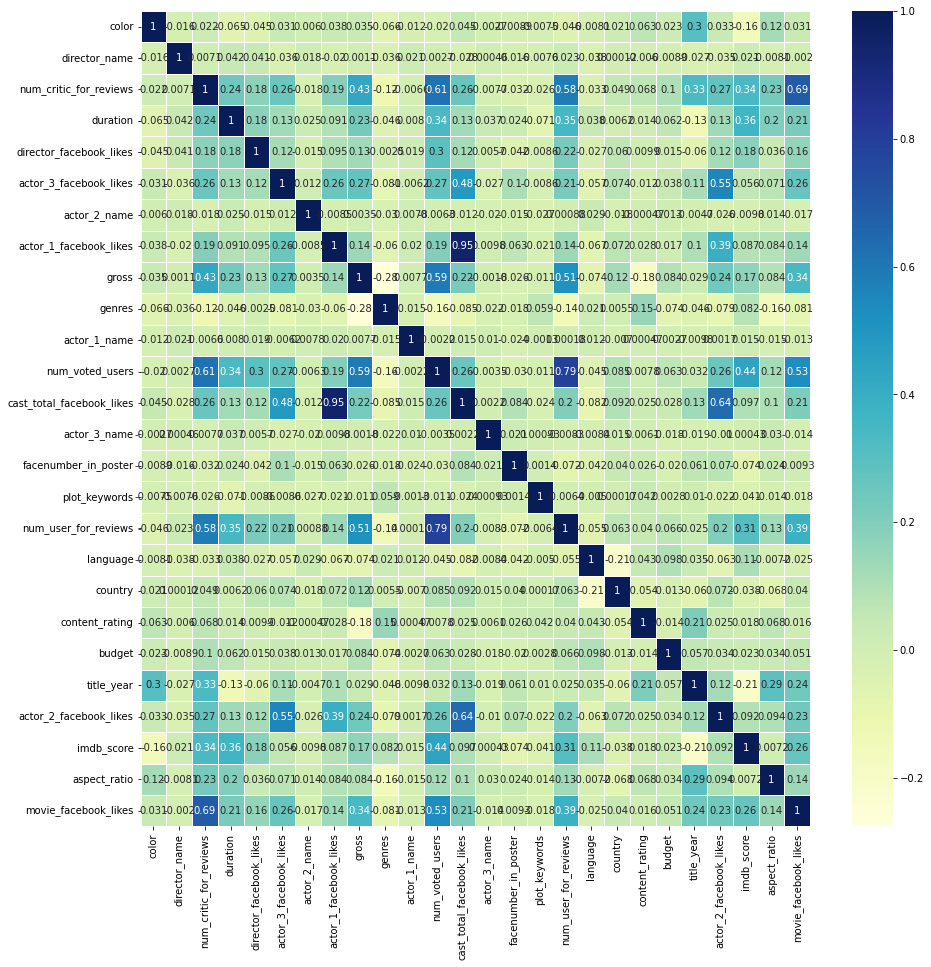

In [46]:
correlations = df.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

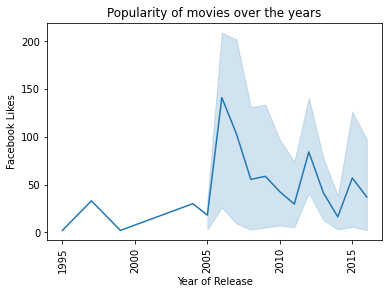

In [62]:
popu = df['title_year'].value_counts().reset_index().sort_values(by='title_year', ascending=False)
temp = []
for i in range(len(popu)):
    temp.append(df.title_year[[popu.index[i]]].values//1)
movies = []
for i in range(len(popu)):
    movies.append(temp[i][0])
popu = pd.DataFrame(zip(movies, popu.title_year), columns=['Year', 'likes'])
plt.title('Popularity of movies over the years')
sns.lineplot(data=popu, x='Year', y='likes')
plt.xticks(rotation=90)
plt.ylabel('Facebook Likes')
plt.xlabel('Year of Release')
plt.show()

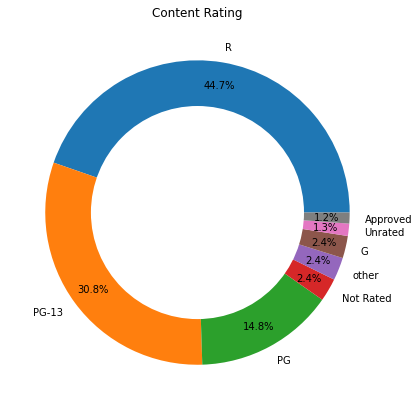

In [64]:
df.loc[df['content_rating'].isin((df['content_rating'].value_counts()[df['content_rating'].value_counts() < 50]).index), 'content_rating'] = 'other'
x = df.content_rating.value_counts().index
y = df.content_rating.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(y, labels=x,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Content Rating')
plt.show()

# sns.distplot(df.content_rating.value_counts())
# plt.title('Distribution of content rating corrected')
# plt.show()

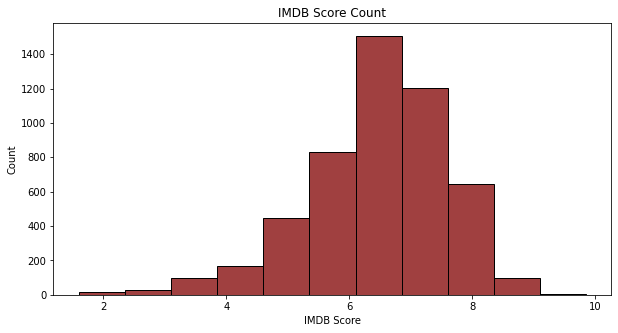

In [65]:
plt.figure(figsize=(10,5))
plt.title('IMDB Score Count')
plt.xlabel('IMDB Score')
sns.histplot(data=df,x='imdb_score',color='maroon',binwidth=0.75)
plt.show()

Now checking the popularity of the cast of movie based on the number of facebook likes the entire cast have

In [66]:
top10 = df['cast_total_facebook_likes'].value_counts().reset_index().sort_values(by='cast_total_facebook_likes', ascending=False).head(10)
temp = []
for i in range(10):
    temp.append(df.movie_title.iloc[[top10.index[i]]].values)
movies = []
for i in range(10):
    movies.append(temp[i][0])
top10 = pd.DataFrame(zip(movies, top10.cast_total_facebook_likes), columns=['movies', 'likes'])
top10

,movies,likes
0,Avatar,33
1,Pirates of the Caribbean: At World's End,7
2,Spectre,6
3,The Dark Knight Rises,6
4,Star Wars: Episode VII - The Force Awakens ...,5
5,John Carter,5
6,Spider-Man 3,5
7,Titanic,4
8,The Amazing Spider-Man,4
9,Robin Hood,4


The above table shows top 10 movies ranked by cast popularity on facebook

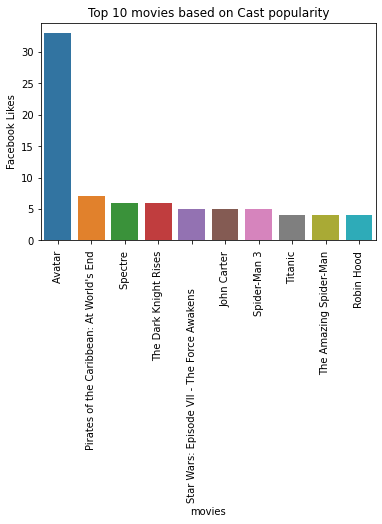

In [67]:
plt.title('Top 10 movies based on Cast popularity')
sns.barplot(data=top10, x='movies', y='likes')
plt.xticks(rotation=90)
plt.ylabel('Facebook Likes')
plt.show()

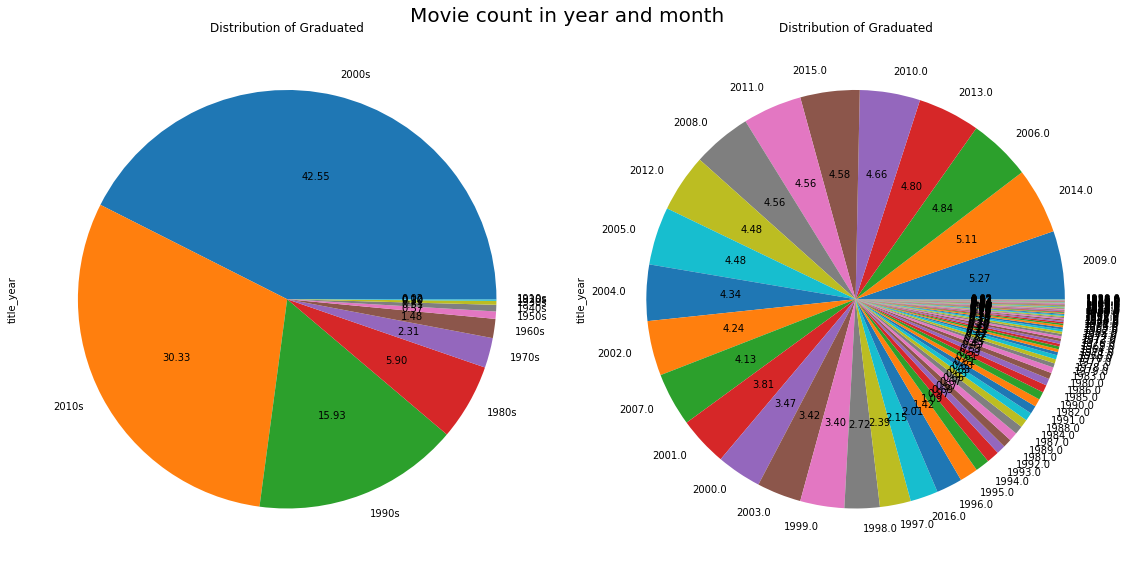

In [72]:
fig, ax  = plt.subplots(1,2,figsize = (16,8))
fig.suptitle('Movie count in year and month', fontsize=20)
 
movie_count_in_10th_year = df["title_year"].dropna().apply(lambda x:str(int(x)//10*10)+'s').value_counts()
movie_count_in_month = df["title_year"].value_counts()
    
movie_count_in_10th_year.plot.pie(title='Distribution of Graduated', ax=ax[0], autopct="%.2f")
movie_count_in_month.plot.pie(title='Distribution of Graduated', ax=ax[1], autopct="%.2f")
fig.tight_layout()


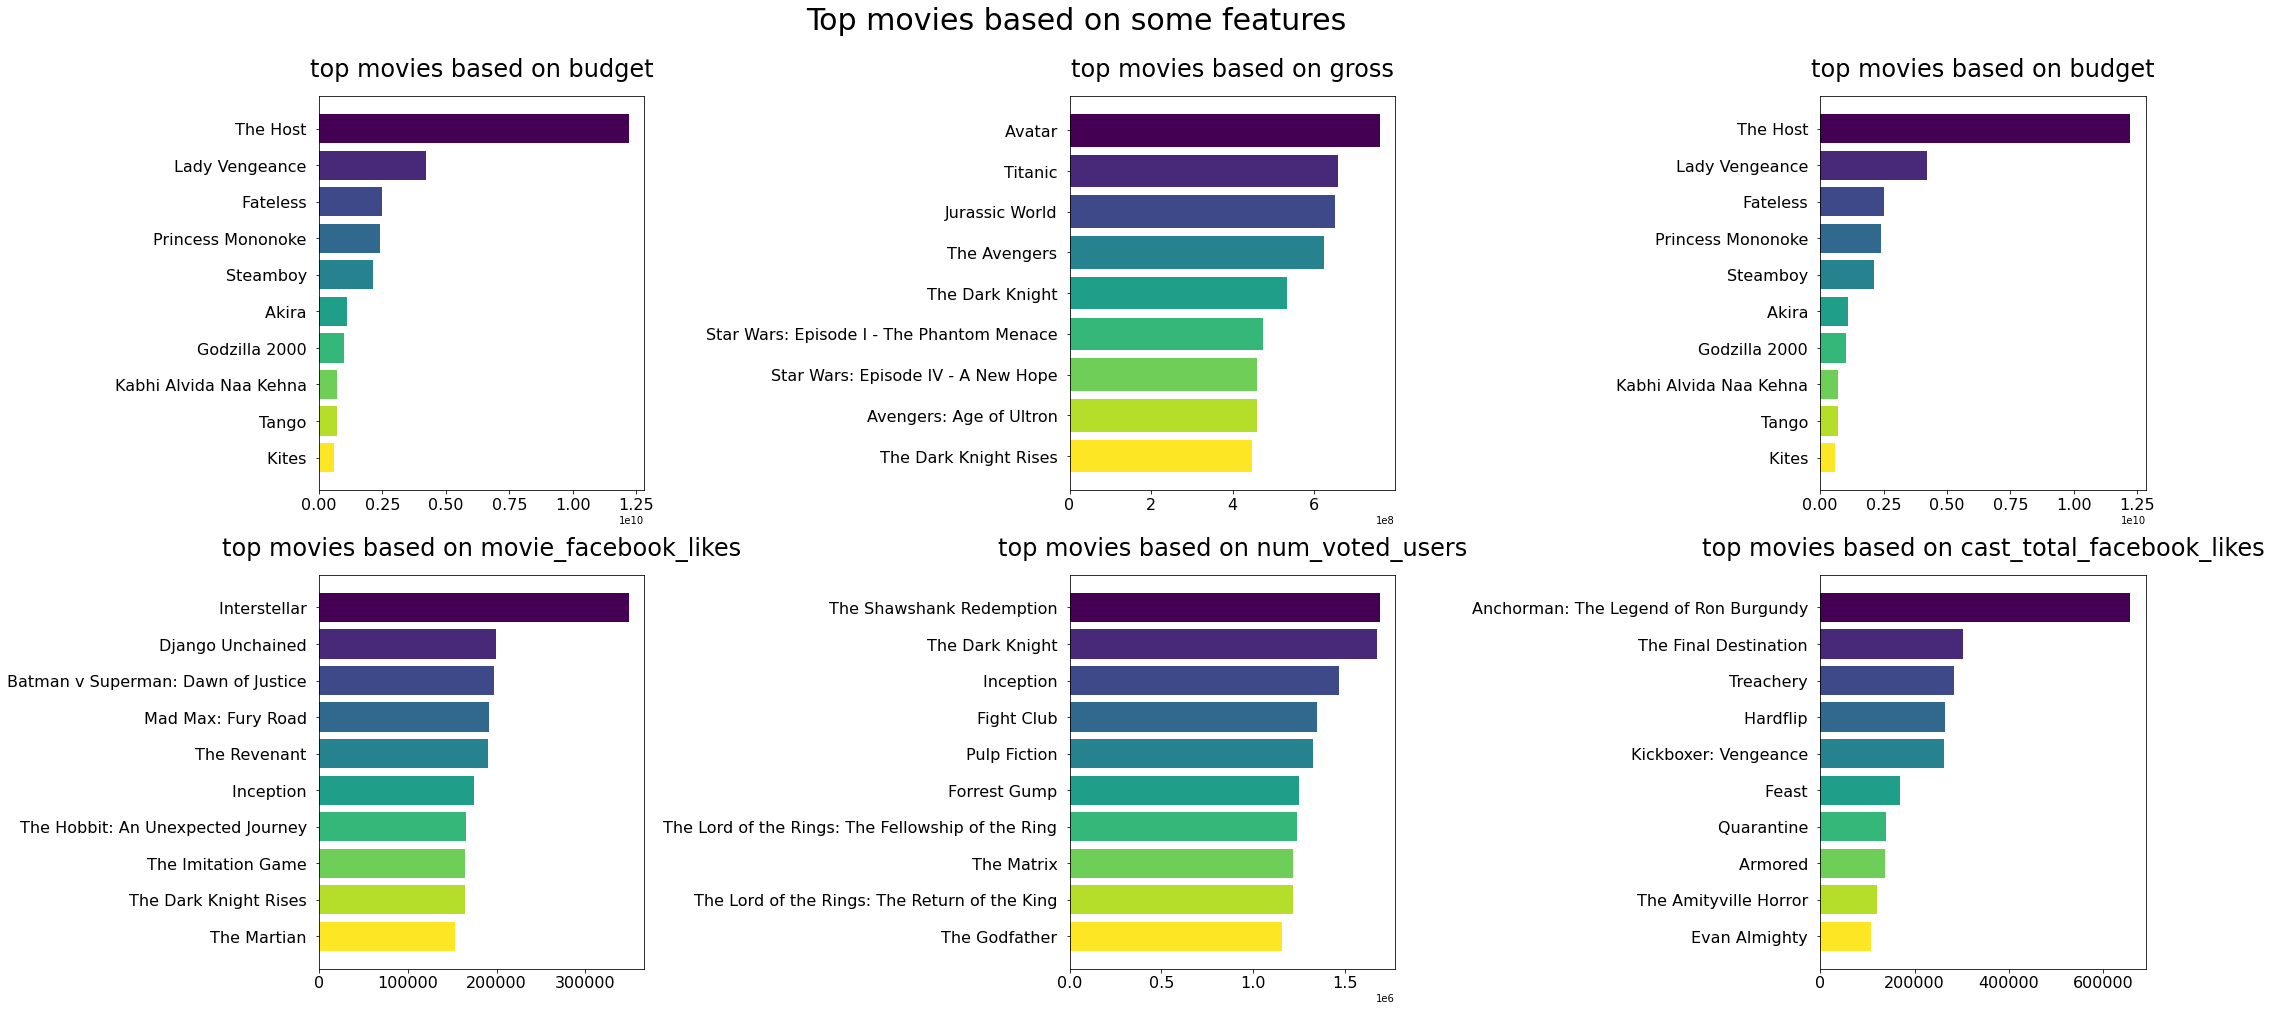

In [85]:
top_movie_num = 10
top_movies_based_on = ["budget", "gross", "budget", "movie_facebook_likes", "num_voted_users", "cast_total_facebook_likes"]
 
fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))
colors = plt.cm.get_cmap('viridis', top_movie_num)
 
for i, col in enumerate(top_movies_based_on):
    top_movies_by = df.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    ax[r][c].barh(top_movies_by["movie_title"], top_movies_by[col], color=colors.colors)
    ax[r][c].set_title(f"top movies based on {col}", fontsize=24, pad=20)
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)
    ax[r][c].invert_yaxis()    
    
plt.suptitle('Top movies based on some features',fontsize=30, y=1)
fig.tight_layout()


<AxesSubplot: xlabel='duration', ylabel='imdb_score'>

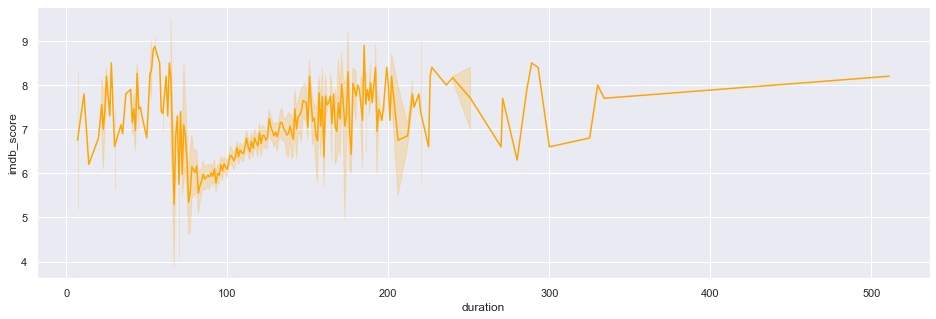

In [91]:
plt.figure(figsize=(16,5))
sns.set(style='darkgrid')
sns.lineplot(data=df,x='duration',y='imdb_score',color='orange')

In [ ]:
df.to_csv(r'C:\Users\user\Downloads\out.csv', index = False)